# Six tools to improve your ANN

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [2]:
dataset = keras.datasets.fashion_mnist.load_data()

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = dataset

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train, X_valid = X_train_full[:55000], X_train_full[55000:]
y_train, y_valid = y_train_full[:55000], y_train_full[55000:]

In [6]:
X_train.shape

(55000, 28, 28)

## Default Model

In [7]:
X_test = X_test / 255.0
X_train = X_train / 255.0
X_valid = X_valid / 255.0

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

C:\Users\Nikita\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [10]:
model.fit(X_train, y_train, validation_data=(X_train, y_train), epochs=10)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2548 - loss: 2.2484 - val_accuracy: 0.4813 - val_loss: 1.7894
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5807 - loss: 1.6090 - val_accuracy: 0.6450 - val_loss: 1.2119
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6516 - loss: 1.1359 - val_accuracy: 0.6849 - val_loss: 0.9594
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6939 - loss: 0.9206 - val_accuracy: 0.7140 - val_loss: 0.8275
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7197 - loss: 0.8026 - val_accuracy: 0.7363 - val_loss: 0.7478
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7316 - loss: 0.7393 - val_accuracy: 0.7484 - val_loss: 0.6931
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7481 - loss: 0.6826 - val_accuracy: 0.7584 - val_loss: 0.6541
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7585 - loss: 0.6548 - 

In [11]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7814 - loss: 0.5967


[0.6003639698028564, 0.7777000069618225]

## Modification from article 1

### Adding normalization layer

In [12]:
norm_layer = keras.layers.Normalization()

In [13]:
(X_train_full, y_train_full), (X_test, y_test) = dataset
X_train, X_valid = X_train_full[:55000], X_train_full[55000:]
y_train, y_valid = y_train_full[:55000], y_train_full[55000:]

In [14]:
model2 = keras.models.Sequential([
    norm_layer,
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

In [15]:
model2.compile(loss='sparse_categorical_crossentropy',
               optimizer='sgd',
               metrics=['accuracy'])

In [16]:
norm_layer.adapt(X_train)

In [17]:
model2.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4376 - loss: 1.9287 - val_accuracy: 0.7014 - val_loss: 1.0965
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7161 - loss: 0.9995 - val_accuracy: 0.7508 - val_loss: 0.7590
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7531 - loss: 0.7335 - val_accuracy: 0.7776 - val_loss: 0.6409
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7785 - loss: 0.6352 - val_accuracy: 0.7990 - val_loss: 0.5736
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8008 - loss: 0.5703 - val_accuracy: 0.8116 - val_loss: 0.5311
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8143 - loss: 0.5339 - val_accuracy: 0.8218 - val_loss: 0.4990
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8257 - loss: 0.4984 - val_accuracy: 0.8284 - val_loss: 0.4762
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8360 - loss: 0.4702 - 

In [18]:
model2.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8349 - loss: 0.4624


[0.4718877077102661, 0.8295999765396118]

### Modifying Activation and Initialization

In [19]:
model3 = keras.models.Sequential([
    norm_layer,
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

In [20]:
model3.compile(loss='sparse_categorical_crossentropy',
               optimizer='sgd',
               metrics=['accuracy'])

In [21]:
model3.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7829 - loss: 0.6253 - val_accuracy: 0.8514 - val_loss: 0.4086
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8563 - loss: 0.4038 - val_accuracy: 0.8640 - val_loss: 0.3763
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8724 - loss: 0.3586 - val_accuracy: 0.8674 - val_loss: 0.3652
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8820 - loss: 0.3340 - val_accuracy: 0.8584 - val_loss: 0.3896
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8870 - loss: 0.3141 - val_accuracy: 0.8768 - val_loss: 0.3430
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8914 - loss: 0.3023 - val_accuracy: 0.8722 - val_loss: 0.3519
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8963 - loss: 0.2869 - val_accuracy: 0.8734 - val_loss: 0.3377
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9012 - loss: 0.2774 - 

In [22]:
model3.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8764 - loss: 0.3558


[0.3570519983768463, 0.8744000196456909]

## Modification from article 2

In [24]:
%pip install -q -U keras-tuner

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\Nikita\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Tuning hyperparameters + adding learning rate scheduling and modifying optimizer

In [25]:
import keras_tuner as kt

In [26]:
def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate_initial = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    learning_rate_initial,
    10000,
    0.8)
    
    optimizer = keras.optimizers.Nadam(learning_rate=lr_schedule)

    model = tf.keras.Sequential()
    model.add(norm_layer)
    model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="selu", kernel_initializer='lecun_normal'))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

In [27]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=10, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)

random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 10 Complete [00h 01m 18s]
val_accuracy: 0.8895999789237976

Best val_accuracy So Far: 0.8895999789237976
Total elapsed time: 00h 08m 42s


In [28]:
top_params = random_search_tuner.get_best_hyperparameters(num_trials=1)
top_params[0].values

{'n_hidden': 6, 'n_neurons': 235, 'learning_rate': 0.00044412650444693207}

In [29]:
best_model = random_search_tuner.get_best_models(num_models=1)[0]

C:\Users\Nikita\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'nadam', because it has 1 variables whereas the saved optimizer has 30 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [30]:
best_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8830 - loss: 0.3920


[0.3801802098751068, 0.8841999769210815]

## Here I plot some graphs for the article

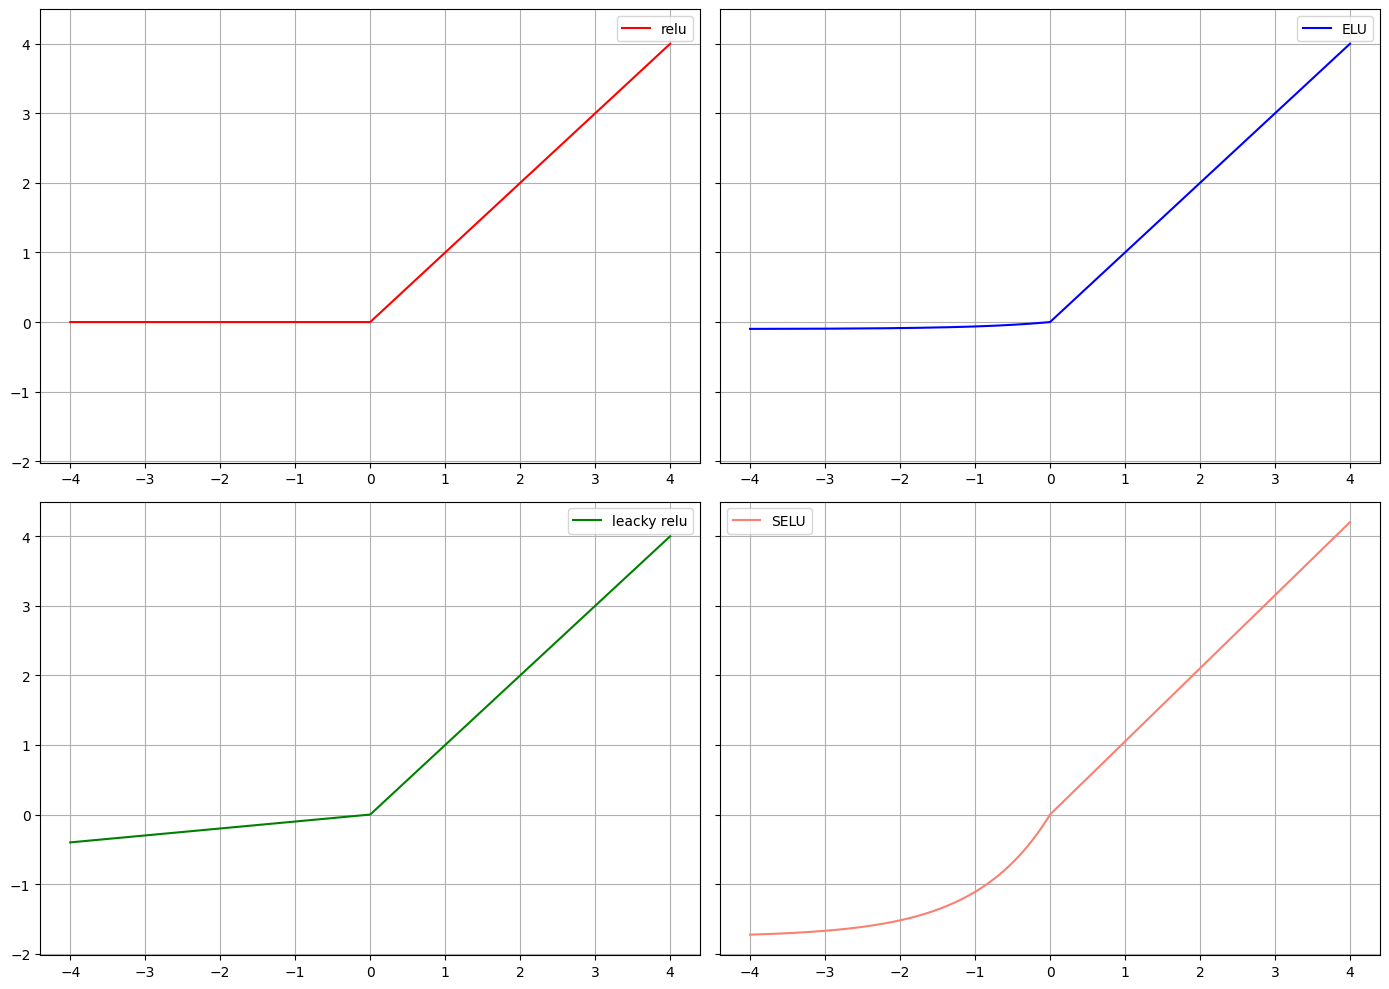

In [31]:
xs = np.linspace(-4, 4, 1000)

y_relu = np.array(list(map(lambda x: x if x > 0 else 0, list(xs))))
y_lrelu = np.array(list(map(lambda x: x if x > 0 else 0.1*x, list(xs))))
y_elu = np.array(list(map(lambda x: x if x > 0 else 0.1*(math.exp(x)-1), list(xs))))
y_selu = np.array(list(map(lambda x: 1.05070098*x if x > 0 else 1.05070098*1.67326324*(math.exp(x)-1), list(xs))))

functions = [y_relu, y_elu, y_lrelu, y_selu]
func_names = ['relu', 'ELU', 'leacky relu', 'SELU']
func_colors = ['r', 'b', 'g', 'salmon']
fig, axs = plt.subplots(2, 2, sharey=True, figsize=(14, 10))

for i in range(2):
    for j in range(2):
        axs[i, j].plot(xs, functions[2*i+j], label=func_names[2*i+j], c=func_colors[2*i+j])
        axs[i, j].legend()
        axs[i, j].grid(True)
fig.savefig('activations.png')
fig.tight_layout()

plt.show()

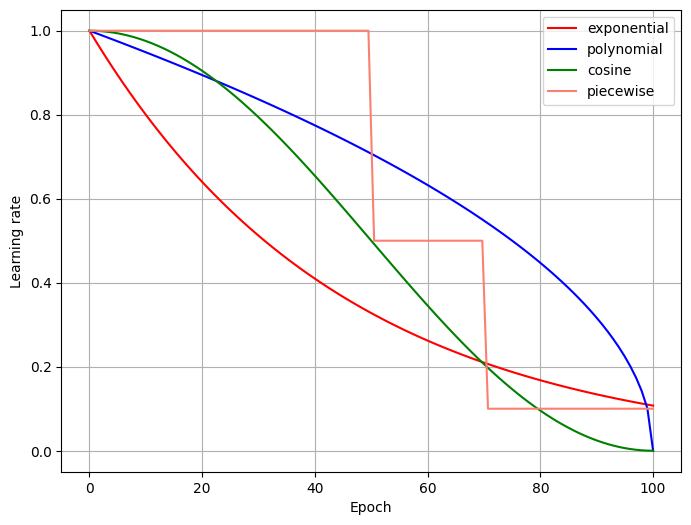

In [32]:
xs = np.linspace(0, 100, 100)

exponential = np.array(list(map(tf.keras.optimizers.schedules.ExponentialDecay(1.0, 10, 0.8), list(xs))))
polynomial = np.array(list(map(tf.keras.optimizers.schedules.PolynomialDecay(1.0, 100, power=0.5), list(xs))))
cosine = np.array(list(map(tf.keras.optimizers.schedules.CosineDecay(1.0, 100), list(xs))))
piecewise = np.array(list(map(tf.keras.optimizers.schedules.PiecewiseConstantDecay(boundaries = [50, 70], values = [1.0, 0.5, 0.1]), list(xs))))

schedulers = [exponential, polynomial, cosine, piecewise]
labels = ['exponential', 'polynomial', 'cosine', 'piecewise']
plt.figure(figsize=(8, 6))
for i in range(2):
    for j in range(2):
        plt.plot(xs, schedulers[2*i+j], label=labels[2*i+j], c=func_colors[2*i+j])
plt.legend()
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Learning rate')

plt.savefig('scheduling.png')
plt.show()